# Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

## Background Information
Some boroughs are more desirable areas to live in than others, what does the data reflect about housing prices in the different buroughs.


## Skills 
- **pandas**
    - **data ingestion and inspection**
    - **exploratory data analysis**
    - **tidying and cleaning**
    - **transforming DataFrames**
    - **subsetting DataFrames with lists**
    - **filtering DataFrames**
    - **grouping data**
    - **melting data**
    - **advanced indexing**
- **matplotlib**
- **fundamental data types**
- **dictionaries**
- **handling dates and times**
- **function definition**
- **default arguments, variable length, and scope** 
- **lambda functions and error handling** 
- **Plotly for interactive visualisations** 

## Goal

Apply machine learning algorithms to analyse London house prices in the different boroughs of London and Greater London to determine which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#loading interactive plot libraries 
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import plotly.express as px

#### 1.2.  Loading the data
Source: [London Datastore](https://data.london.gov.uk/) where we can download the data in the form of Excel spreadsheets

In [2]:
url_LondonHousePrices= "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 

# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing

**2.1. Exploring your data** 

In [3]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [4]:
properties.shape

(337, 49)

In [5]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            336 non-null    datetime64[ns]
 1   City of London        337 non-null    object        
 2   Barking & Dagenham    337 non-null    object        
 3   Barnet                337 non-null    object        
 4   Bexley                337 non-null    object        
 5   Brent                 337 non-null    object        
 6   Bromley               337 non-null    object        
 7   Camden                337 non-null    object        
 8   Croydon               337 non-null    object        
 9   Ealing                337 non-null    object        
 10  Enfield               337 non-null    object        
 11  Greenwich             337 non-null    object        
 12  Hackney               337 non-null    object        
 13  Hammersmith & Fulham

In [6]:
properties.columns

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [7]:
properties.index

RangeIndex(start=0, stop=337, step=1)

**2.2. Cleaning the data**

1. Transpose the dataframe and redefine the index. We want the names of the boroughs to be the indices and features of the boroughs to be out columns so we can compare the different features of each of the boroughs for our analysis. 
2. We have an 'unnamed' column: rename this column. 
3. We need to assign values of the first row to our column headings after we've transposed the dataframe. 

In [8]:
properties = properties.T

In [9]:
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,327,328,329,330,331,332,333,334,335,336
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994


In [10]:
properties.columns

RangeIndex(start=0, stop=337, step=1)

In [11]:
properties.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [12]:
properties = properties.reset_index()
properties.index

RangeIndex(start=0, stop=49, step=1)

In [13]:
properties.iloc[[0]]

,index,0,1,2,3,4,5,6,7,8,...,327,328,329,330,331,332,333,334,335,336
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00


In [14]:
properties.columns = properties.iloc[0]

In [15]:
properties.columns

Index([       'Unnamed: 0',                 NaT, 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2022-03-01 00:00:00, 2022-04-01 00:00:00, 2022-05-01 00:00:00,
       2022-06-01 00:00:00, 2022-07-01 00:00:00, 2022-08-01 00:00:00,
       2022-09-01 00:00:00, 2022-10-01 00:00:00, 2022-11-01 00:00:00,
       2022-12-01 00:00:00],
      dtype='object', name=0, length=338)

**2.3. Cleaning the data (part 2)**

Renaming columns.

In [16]:
properties.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994


In [17]:
properties=properties.iloc[1:,:]

In [18]:
properties.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,508372.8301,522338.64309,533942.03626,536486.89116,552316.75952,562407.51963,584927.5386,578010.59307,572262.24808,566794.73925


In [19]:
properties = properties.rename(columns={'Unnamed: 0':'London_Boroughs', pd.NaT :'ID'})

In [20]:
properties.head()

,London_Boroughs,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,816775.77458,808791.66477,797896.0674,819762.37181,809689.46627,827996.60081,827441.27622,870799.60044,948073.2088,968059.9863
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,337639.17828,333921.39153,337201.79953,345873.99616,349371.12076,350239.35981,349653.85502,355290.62346,359495.10689,362054.07567
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,573655.09452,581811.27928,587188.06846,592754.89104,594041.83267,601931.6599,605424.18481,597777.32861,587967.70766,595486.30411
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,386972.05239,385161.3244,386673.4299,391819.71089,396385.99016,402667.50443,403468.56545,409719.69933,410407.63764,416059.80994
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,508372.8301,522338.64309,533942.03626,536486.89116,552316.75952,562407.51963,584927.5386,578010.59307,572262.24808,566794.73925


**2.4.Transforming the data**

Tidying up dataset using .melt()

In [21]:
#change the type of table : tall vs wide 
melted_properties = pd.melt(properties, id_vars = ['London_Boroughs','ID'])
print(melted_properties.head())
print(melted_properties.columns)


      London_Boroughs         ID          0        value
0      City of London  E09000001 1995-01-01  91448.98487
1  Barking & Dagenham  E09000002 1995-01-01   50460.2266
2              Barnet  E09000003 1995-01-01  93284.51832
3              Bexley  E09000004 1995-01-01  64958.09036
4               Brent  E09000005 1995-01-01  71306.56698
Index(['London_Boroughs', 'ID', 0, 'value'], dtype='object')


In [22]:
melted_properties = melted_properties.rename(columns= { 0: 'Date', 'value' :'Average_Price'})
melted_properties.head()

,London_Boroughs,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Check data types of the columns- we want to work with numerical values, particularly decimals for the average price of houses. 

In [23]:
melted_properties.dtypes

London_Boroughs            object
ID                         object
Date               datetime64[ns]
Average_Price              object
dtype: object

In [24]:
melted_properties['Average_Price'] = pd.to_numeric(melted_properties['Average_Price'], downcast='float', errors='coerce')
melted_properties.head()

,London_Boroughs,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,91448.984375
1,Barking & Dagenham,E09000002,1995-01-01,50460.226562
2,Barnet,E09000003,1995-01-01,93284.515625
3,Bexley,E09000004,1995-01-01,64958.089844
4,Brent,E09000005,1995-01-01,71306.570312


In [25]:
melted_properties.dtypes

London_Boroughs            object
ID                         object
Date               datetime64[ns]
Average_Price             float32
dtype: object

In [26]:
melted_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16128 entries, 0 to 16127
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   London_Boroughs  16128 non-null  object        
 1   ID               15120 non-null  object        
 2   Date             16128 non-null  datetime64[ns]
 3   Average_Price    15120 non-null  float32       
dtypes: datetime64[ns](1), float32(1), object(2)
memory usage: 441.1+ KB


**2.5. Cleaning the data (part 3)**

Checking and handling missing values. As stated in the beginning there are 32 buroughs so will need to double check if all of them, and only them are represented in the dataset. 

In [27]:
melted_properties['London_Boroughs'].nunique() # we are supposed to have 32 buroughs not 42...

48

In [28]:
melted_properties['London_Boroughs'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [29]:
not_boroughs = ['City of London', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England']

In [30]:
melted_properties[melted_properties['London_Boroughs'] == 'ENGLAND'].head()
#useless info - unnamed: 34,37 and 47 have NaN as ID 
#North East, North West,ENGLAND has nothing

,London_Boroughs,ID,Date,Average_Price


In [31]:
#first drop everything that has unnamed : 34, 37 and 47 as these are empty rows
melted_properties[melted_properties['ID'].isna()]

,London_Boroughs,ID,Date,Average_Price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
16068,Unnamed: 37,NaN,2022-11-01,NaN
16078,Unnamed: 47,NaN,2022-11-01,NaN
16113,Unnamed: 34,NaN,2022-12-01,NaN
16116,Unnamed: 37,NaN,2022-12-01,NaN


In [32]:
# all the places where the ID is not not empty
no_null_properties = melted_properties[melted_properties['ID'].notna()]

In [33]:
no_null_properties.head()

,London_Boroughs,ID,Date,Average_Price
0,City of London,E09000001,1995-01-01,91448.984375
1,Barking & Dagenham,E09000002,1995-01-01,50460.226562
2,Barnet,E09000003,1995-01-01,93284.515625
3,Bexley,E09000004,1995-01-01,64958.089844
4,Brent,E09000005,1995-01-01,71306.570312


In [34]:
no_null_properties.info() #problem is we now have 3 rows that don't have a averge price but has id

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 0 to 16127
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   London_Boroughs  15120 non-null  object        
 1   ID               15120 non-null  object        
 2   Date             15120 non-null  datetime64[ns]
 3   Average_Price    15120 non-null  float32       
dtypes: datetime64[ns](1), float32(1), object(2)
memory usage: 531.6+ KB


In [35]:
no_null_properties = no_null_properties[no_null_properties['Average_Price'].notna()]
print(no_null_properties.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 0 to 16127
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   London_Boroughs  15120 non-null  object        
 1   ID               15120 non-null  object        
 2   Date             15120 non-null  datetime64[ns]
 3   Average_Price    15120 non-null  float32       
dtypes: datetime64[ns](1), float32(1), object(2)
memory usage: 531.6+ KB
None


In [36]:
no_null_properties.isna().sum() #now we have no missing values

London_Boroughs    0
ID                 0
Date               0
Average_Price      0
dtype: int64

In [37]:
no_null_properties['London_Boroughs'].nunique() #this is giving 45 boroughs when there should only be 32

45

In [38]:
not_boroughs_updated = ['City of London', 'Inner London', 'Outer London', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'England']
boroughs = ['Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster']
# https://en.wikipedia.org/wiki/List_of_London_boroughs

In [39]:
only_london_boroughs= no_null_properties[~no_null_properties['London_Boroughs'].isin(not_boroughs_updated)]

In [40]:
print(only_london_boroughs.isna().sum()) #now we have 32 rows for only the London Boroughs and none of the info is null
print(only_london_boroughs.nunique())
print(only_london_boroughs['London_Boroughs'].unique())#matches our list of london boroughs

London_Boroughs    0
ID                 0
Date               0
Average_Price      0
dtype: int64
London_Boroughs       32
ID                    32
Date                 336
Average_Price      10750
dtype: int64
['Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney' 'Hammersmith & Fulham'
 'Haringey' 'Harrow' 'Havering' 'Hillingdon' 'Hounslow' 'Islington'
 'Kensington & Chelsea' 'Kingston upon Thames' 'Lambeth' 'Lewisham'
 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames' 'Southwark' 'Sutton'
 'Tower Hamlets' 'Waltham Forest' 'Wandsworth' 'Westminster']


In [41]:
only_london_boroughs.head()

,London_Boroughs,ID,Date,Average_Price
1,Barking & Dagenham,E09000002,1995-01-01,50460.226562
2,Barnet,E09000003,1995-01-01,93284.515625
3,Bexley,E09000004,1995-01-01,64958.089844
4,Brent,E09000005,1995-01-01,71306.570312
5,Bromley,E09000006,1995-01-01,81671.476562


In [42]:
#So now we have 2 dataframes
# 1. no_null_properties - this has no null values 
# 2. only_london_buroughs - this has no null values and ONLY the 32 official buroughs of London

**2.6. Visualizing the data**


In [43]:
only_london_boroughs[only_london_boroughs['London_Boroughs']=='Barking & Dagenham']

,London_Boroughs,ID,Date,Average_Price
1,Barking & Dagenham,E09000002,1995-01-01,50460.226562
49,Barking & Dagenham,E09000002,1995-02-01,51085.781250
97,Barking & Dagenham,E09000002,1995-03-01,51268.968750
145,Barking & Dagenham,E09000002,1995-04-01,53133.503906
193,Barking & Dagenham,E09000002,1995-05-01,53042.250000
...,...,...,...,...
15889,Barking & Dagenham,E09000002,2022-08-01,350239.375000
15937,Barking & Dagenham,E09000002,2022-09-01,349653.843750
15985,Barking & Dagenham,E09000002,2022-10-01,355290.625000
16033,Barking & Dagenham,E09000002,2022-11-01,359495.093750


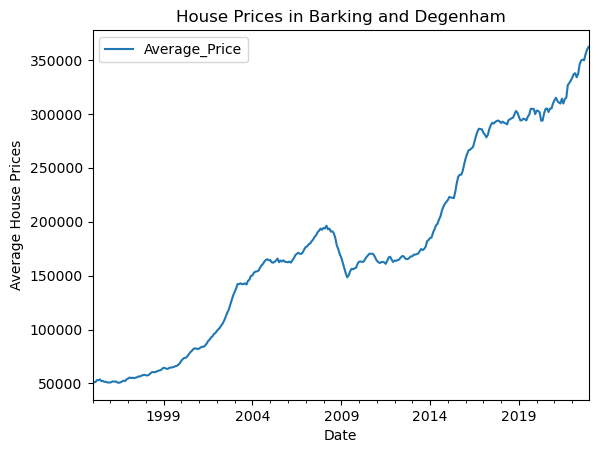

In [44]:
only_london_boroughs[only_london_boroughs['London_Boroughs']=='Barking & Dagenham'].plot(kind = 'line', x='Date',y='Average_Price')
plt.title('House Prices in Barking and Degenham')
plt.ylabel('Average House Prices')
plt.show();

In [45]:
testing_plotly= only_london_boroughs[only_london_boroughs['London_Boroughs']=='Barking & Dagenham']
testing_plotly.head()

,London_Boroughs,ID,Date,Average_Price
1,Barking & Dagenham,E09000002,1995-01-01,50460.226562
49,Barking & Dagenham,E09000002,1995-02-01,51085.781250
97,Barking & Dagenham,E09000002,1995-03-01,51268.968750
145,Barking & Dagenham,E09000002,1995-04-01,53133.503906
193,Barking & Dagenham,E09000002,1995-05-01,53042.250000


In [46]:
fig = px.line(testing_plotly, x = 'Date', y='Average_Price', title = 'House Prices in Barking and Degenham')
fig.show();

The advantage of a interactice plot like this is we can explicitly see the slumps and peaks over the years. We can see the slump in 2008-2009 which coincides with the financial crisis of 2008. 

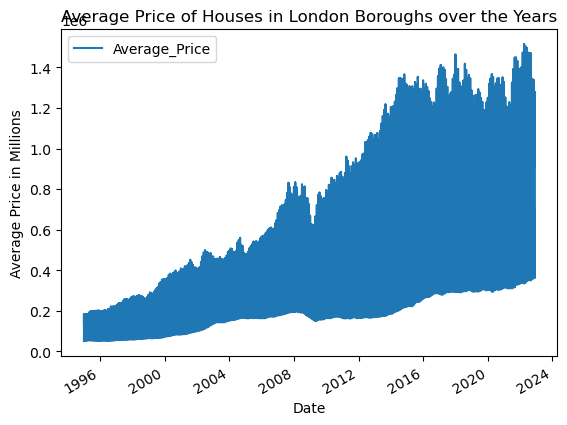

In [47]:
only_london_boroughs.plot(kind = 'line', x='Date',y='Average_Price')
plt.title('Average Price of Houses in London Boroughs over the Years')
plt.ylabel('Average Price in Millions')
plt.show();

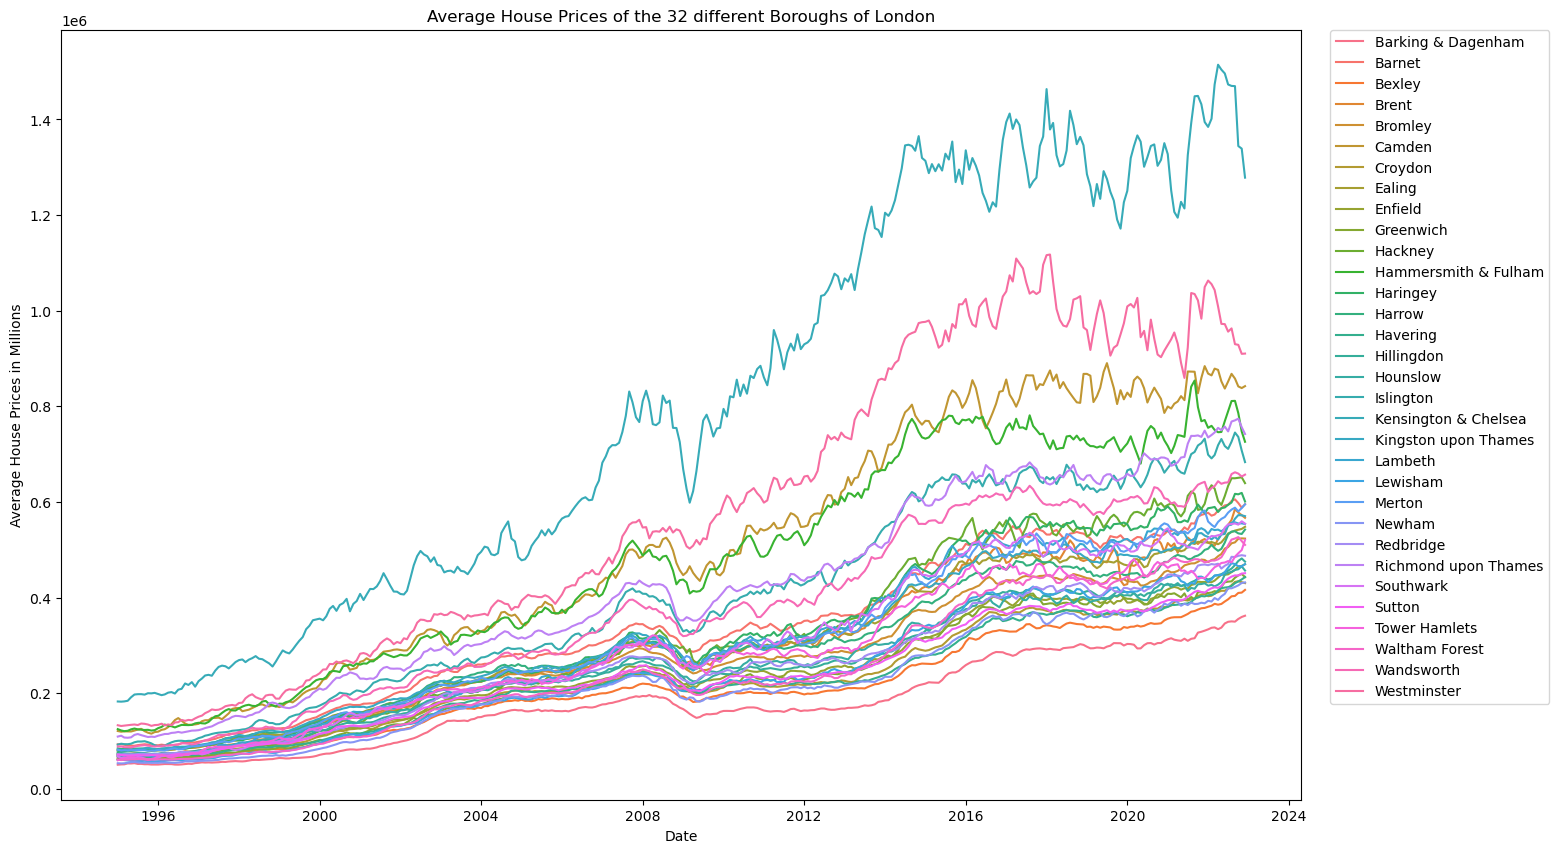

In [48]:
#each line representing the 32 boroughs of london
plt.figure(figsize=(16,10))
sns.lineplot(data = only_london_boroughs, x='Date',y='Average_Price', hue= 'London_Boroughs')
plt.title('Average House Prices of the 32 different Boroughs of London')
plt.legend(bbox_to_anchor=(1.2,1), loc='upper right', borderaxespad=0)
plt.ylabel('Average House Prices in Millions')
plt.show();

Whilst we can see the boroughs all show similar trends in their house prices, this visualisation is a little difficult to use for deeper analysis.

In [49]:
fig = px.line(only_london_boroughs, x = 'Date', y='Average_Price', color = 'London_Boroughs', title='Average House Prices of the 32 different Boroughs of London')
fig.show()

##### Smoothing out the curves

One way we can smooth out the curves it to limit the number of data points by extracting the year from every month value from the **month** column. 

**Skills** Using Lambda Expressions 

In [50]:
only_london_boroughs['Year'] = only_london_boroughs['Date'].apply(lambda y: y.year)

In [51]:
print(only_london_boroughs.head())
print(only_london_boroughs.tail())

      London_Boroughs         ID       Date  Average_Price  Year
1  Barking & Dagenham  E09000002 1995-01-01   50460.226562  1995
2              Barnet  E09000003 1995-01-01   93284.515625  1995
3              Bexley  E09000004 1995-01-01   64958.089844  1995
4               Brent  E09000005 1995-01-01   71306.570312  1995
5             Bromley  E09000006 1995-01-01   81671.476562  1995
      London_Boroughs         ID       Date  Average_Price  Year
16108          Sutton  E09000029 2022-12-01   450999.68750  2022
16109   Tower Hamlets  E09000030 2022-12-01   520524.71875  2022
16110  Waltham Forest  E09000031 2022-12-01   510178.71875  2022
16111      Wandsworth  E09000032 2022-12-01   657123.50000  2022
16112     Westminster  E09000033 2022-12-01   910286.62500  2022


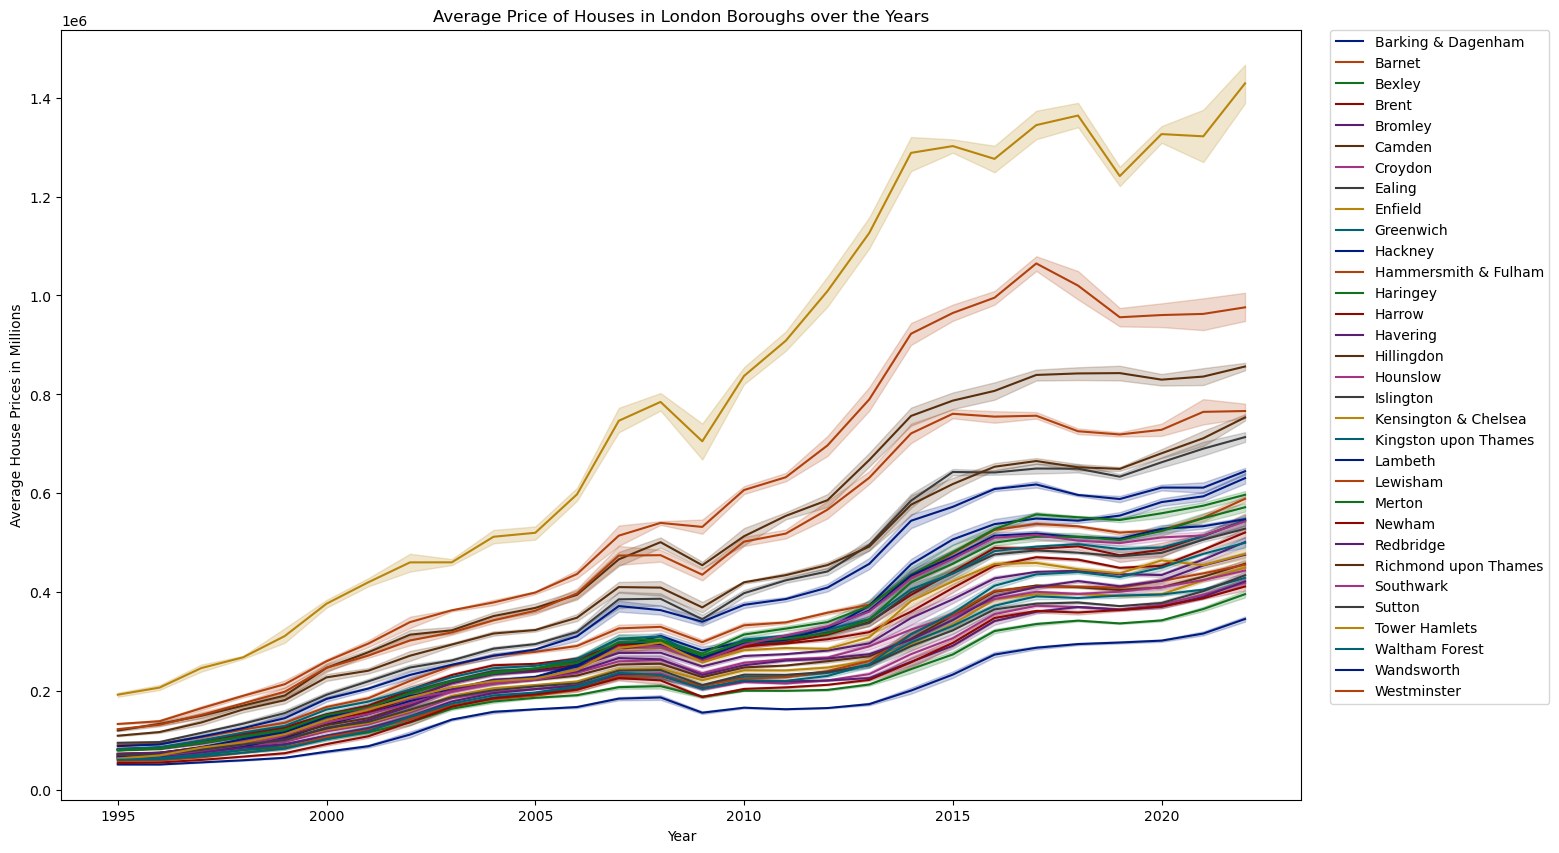

In [52]:
plt.figure(figsize=(16,10))
sns.lineplot(data = only_london_boroughs, x='Year',y='Average_Price', hue= 'London_Boroughs', palette = 'dark')
plt.title('Average Price of Houses in London Boroughs over the Years')
plt.ylabel('Average House Prices in Millions')
plt.legend(bbox_to_anchor=(1.2,1), loc='upper right', borderaxespad=0)
#hard to see which line is the best one...

In [53]:
fig = px.line(only_london_boroughs, x = 'Year', y='Average_Price', color = 'London_Boroughs', title = 'Average Price of Houses in London Boroughs over the Years')
fig.show()

In [54]:
#greatest house price increase on average- first lets look at year on year (mean) increase per borough
test = only_london_boroughs.groupby(by=['London_Boroughs','Year'])

In [55]:
test.head()

,London_Boroughs,ID,Date,Average_Price,Year
1,Barking & Dagenham,E09000002,1995-01-01,50460.226562,1995
2,Barnet,E09000003,1995-01-01,93284.515625,1995
3,Bexley,E09000004,1995-01-01,64958.089844,1995
4,Brent,E09000005,1995-01-01,71306.570312,1995
5,Bromley,E09000006,1995-01-01,81671.476562,1995
...,...,...,...,...,...
15772,Sutton,E09000029,2022-05-01,424066.937500,2022
15773,Tower Hamlets,E09000030,2022-05-01,472314.531250,2022
15774,Waltham Forest,E09000031,2022-05-01,484324.156250,2022
15775,Wandsworth,E09000032,2022-05-01,637979.125000,2022


We can see we have a lot of repeats of the boroughs, so we need to think of a way of looking at an average year on year increase per borough

In [56]:
test.mean()
test.sample(5)

,London_Boroughs,ID,Date,Average_Price,Year
289,Barking & Dagenham,E09000002,1995-07-01,52113.121094,1995
241,Barking & Dagenham,E09000002,1995-06-01,53700.347656,1995
529,Barking & Dagenham,E09000002,1995-12-01,50945.183594,1995
97,Barking & Dagenham,E09000002,1995-03-01,51268.968750,1995
49,Barking & Dagenham,E09000002,1995-02-01,51085.781250,1995
...,...,...,...,...,...
16016,Westminster,E09000033,2022-10-01,928549.812500,2022
15920,Westminster,E09000033,2022-08-01,962930.000000,2022
16112,Westminster,E09000033,2022-12-01,910286.625000,2022
15872,Westminster,E09000033,2022-07-01,956176.187500,2022


In [57]:
grouped_ld_boroughs = test.mean().reset_index()
grouped_ld_boroughs.head()

,London_Boroughs,Year,Average_Price
0,Barking & Dagenham,1995,51817.968750
1,Barking & Dagenham,1996,51718.191406
2,Barking & Dagenham,1997,55974.261719
3,Barking & Dagenham,1998,60285.820312
4,Barking & Dagenham,1999,65320.933594


In [58]:
fig = px.line(grouped_ld_boroughs, x = 'Year', y='Average_Price', color = 'London_Boroughs')
fig.show()

In [59]:
#ADDITIONAL THINGS TO CONSIDER
#greatest individual increase year on year 
#how many times have borough changed rankings 
#look at absolotue changes in average house prices year on year
#year on year: which year saw the max increase and max decrease

**3. Modeling**

1. Create a function, create_price_ratio,  that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998. 

> *Function: create_price_ratio*
> 1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. 
> 2. Get the Average Price for that Borough, for the years 1998 and 2018.
> 4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
> 5. Return that ratio.

2. Iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.


In [60]:
#we are just going to work with groupled_ld_boroughs for now 
df = grouped_ld_boroughs

In [61]:
df.head()

,London_Boroughs,Year,Average_Price
0,Barking & Dagenham,1995,51817.968750
1,Barking & Dagenham,1996,51718.191406
2,Barking & Dagenham,1997,55974.261719
3,Barking & Dagenham,1998,60285.820312
4,Barking & Dagenham,1999,65320.933594


In [62]:
test2 = df[df['London_Boroughs']=='Barking & Dagenham']

In [63]:
test2

,London_Boroughs,Year,Average_Price
0,Barking & Dagenham,1995,51817.968750
1,Barking & Dagenham,1996,51718.191406
2,Barking & Dagenham,1997,55974.261719
3,Barking & Dagenham,1998,60285.820312
4,Barking & Dagenham,1999,65320.933594
5,Barking & Dagenham,2000,77549.515625
6,Barking & Dagenham,2001,88664.062500
7,Barking & Dagenham,2002,112221.914062
8,Barking & Dagenham,2003,142498.921875
9,Barking & Dagenham,2004,158175.984375


In [64]:
#ratio of 2018 to 1998 house prices for Barking and Dagenham
test2.iloc[23]['Average_Price']/test2.iloc[3]['Average_Price']

4.896619

In [65]:
type(test2.iloc[3]['Average_Price'])

numpy.float32

In [66]:
#a function which gives the ratio of 2018:1998 house prices as 1: something
def create_price_ratio(x):
    year_1998 = x.iloc[3]['Average_Price']
    year_2018 = x.iloc[23]['Average_Price']
    price_ratio = year_2018/year_1998
    return price_ratio

In [67]:
#testing function
create_price_ratio(df[df['London_Boroughs']=='Westminster'])

5.353565

In [68]:
#testing function - matches our previous value 
create_price_ratio(df[df['London_Boroughs']=='Barking & Dagenham'])

4.896619

In [69]:
#create an empty dataframe where we will have the London Boroughs as a column and the 2018:1998 ratio as another column
df2 = pd.DataFrame()

In [70]:
#set coloumn to the names of london boroughs
df2['London_Boroughs'] =df['London_Boroughs'].unique()

In [71]:
df2.head() #new dataframe of names of boroughs

,London_Boroughs
0,Barking & Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley


In [72]:
price_ratio = []
for name in df['London_Boroughs'].unique(): #loops over the names of the london boroughs in our grouped london boroughs df
    borough = df[df['London_Boroughs'] == name]
    price_ratio.append(create_price_ratio(borough))#then takes the name = d for the create_price_ratio function 
print(price_ratio)

[4.896619, 4.3581963, 4.2489777, 4.894554, 4.094785, 4.9353538, 4.2011003, 4.311451, 4.2634716, 4.763036, 6.1982856, 4.137798, 5.1346245, 4.0591965, 4.3252306, 4.200273, 3.9764092, 4.844048, 5.082465, 4.27055, 4.9577513, 5.449221, 4.7412734, 5.30539, 4.471182, 4.0051622, 5.516485, 4.118522, 4.6267014, 5.8347554, 4.7577095, 5.353565]


In [73]:
df2['ratio_of_prices'] = price_ratio

In [74]:
df2

,London_Boroughs,ratio_of_prices
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248978
3,Brent,4.894554
4,Bromley,4.094785
5,Camden,4.935354
6,Croydon,4.201100
7,Ealing,4.311451
8,Enfield,4.263472
9,Greenwich,4.763036


In [75]:
highest_change = df2.sort_values(by='ratio_of_prices', ascending = False)

In [76]:
highest_change

,London_Boroughs,ratio_of_prices
10,Hackney,6.198286
29,Waltham Forest,5.834755
26,Southwark,5.516485
21,Lewisham,5.449221
31,Westminster,5.353565
23,Newham,5.305390
12,Haringey,5.134624
18,Kensington & Chelsea,5.082465
20,Lambeth,4.957751
5,Camden,4.935354


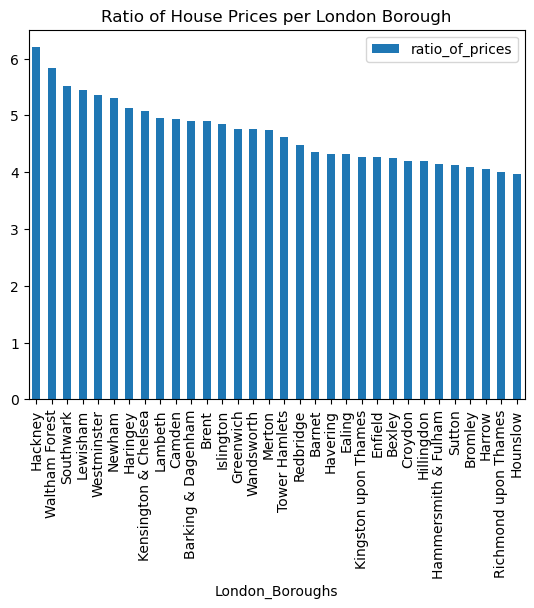

In [77]:
highest_change.plot.bar(x='London_Boroughs', y = 'ratio_of_prices')
plt.title('Ratio of House Prices per London Borough')
plt.show();

In [78]:
fig = px.bar(highest_change, x ='London_Boroughs', y='ratio_of_prices', title="Ratio of 2018 to 1998 House Prices in London Boroughs")
fig.show()

In [79]:
df = grouped_ld_boroughs
df_covid = pd.DataFrame()
df_covid['London_Boroughs'] =df['London_Boroughs'].unique()

Looking at the house prices during the Covid 19 Pandemic (2019-2021)

In [80]:
df_covid

,London_Boroughs
0,Barking & Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley
5,Camden
6,Croydon
7,Ealing
8,Enfield
9,Greenwich


In [81]:
def create_price_ratio_covid(x):
    year_2019 = x.iloc[24]['Average_Price']
    year_2021 = x.iloc[26]['Average_Price']
    price_ratio = year_2021/year_2019
    return price_ratio

In [82]:
test2 = df[df['London_Boroughs']=='Barking & Dagenham']

In [83]:
#ratio of 2019 to 2021 house prices for Barking and Dagenham
test2.iloc[26]['Average_Price']/test2.iloc[24]['Average_Price']

1.0609039

In [84]:
price_ratio_covid = []
for name in df['London_Boroughs'].unique(): #loops over the names of the london boroughs in our grouped london boroughs df
    borough = df[df['London_Boroughs'] == name]
    price_ratio_covid.append(create_price_ratio_covid(borough))#then takes the name = d for the create_price_ratio_covid function 
print(price_ratio_covid)


[1.0609039, 1.0580281, 1.0861216, 1.0821617, 1.0675529, 0.9916999, 1.080586, 1.0711898, 1.0798154, 1.0305464, 1.0701606, 1.0635918, 1.0528691, 1.0814074, 1.0717961, 1.0663122, 1.0587555, 1.0893775, 1.064759, 1.0529803, 1.0498573, 1.0711342, 1.0873997, 1.0652694, 1.1022286, 1.0952407, 1.0308274, 1.0811373, 1.0377188, 1.1085631, 1.0391105, 1.0070908]


In [85]:
df_covid['ratio_of_prices'] = price_ratio_covid

In [86]:
df_covid = df_covid.sort_values(by='ratio_of_prices', ascending = False)

In [87]:
df_covid

,London_Boroughs,ratio_of_prices
29,Waltham Forest,1.108563
24,Redbridge,1.102229
25,Richmond upon Thames,1.095241
17,Islington,1.089378
22,Merton,1.087400
2,Bexley,1.086122
3,Brent,1.082162
13,Harrow,1.081407
27,Sutton,1.081137
6,Croydon,1.080586


In [88]:
fig = px.bar(df_covid, x ='London_Boroughs', y='ratio_of_prices', title="Ratio of 2019 to 2021 House Prices in London Boroughs")
fig.show()

Investigating the effects of the 2007-2008 financial crisis on London housing prices up to the outbreak of Covid 19

In [89]:
#2007 to 2008 financial crisis - main effects were observed from the summer of 2007 so we'll look at the price ratios between the end of 2007 to 2019 to see the recovery 
def create_price_ratio_fcrisis(x):
    year_2007 = x.iloc[12]['Average_Price']
    year_2019 = x.iloc[24]['Average_Price']
    price_ratio = year_2019/year_2007
    return price_ratio
price_ratio_fcrisis = []
for name in df['London_Boroughs'].unique(): #loops over the names of the london boroughs in our grouped london boroughs df
    borough = df[df['London_Boroughs'] == name]
    price_ratio_fcrisis.append(create_price_ratio_fcrisis(borough))#then takes the name = d for the create_price_ratio_covid function 
print(price_ratio_fcrisis)

[1.6134238, 1.5922272, 1.6194651, 1.6541445, 1.5744554, 1.8072731, 1.5649645, 1.6087362, 1.6099015, 1.7184116, 1.910949, 1.5164214, 1.7876052, 1.5310369, 1.5614462, 1.5933114, 1.5412326, 1.6430465, 1.6625918, 1.5913808, 1.7038525, 1.7810056, 1.6970514, 1.6078237, 1.5433105, 1.5825306, 1.7239395, 1.5407412, 1.5262145, 1.8177365, 1.5816498, 1.8583769]


In [90]:
df_fcrisis = pd.DataFrame()
df_fcrisis['London_Boroughs'] =df['London_Boroughs'].unique()
df_fcrisis['ratio_of_prices'] = price_ratio_fcrisis

In [91]:
df_fcrisis = df_fcrisis.sort_values(by='ratio_of_prices', ascending = False)

In [92]:
fig = px.bar(df_fcrisis, x ='London_Boroughs', y='ratio_of_prices', title="Ratio of 2007 to 2019 House Prices in London Boroughs")
fig.show()

### 4. Conclusion
See report of findings. 